### McDonald's Customer Segmentation - Classification

![cover_image](cover_image.jpg)

[Mcdonalds dataset for customer segmentation](https://drive.google.com/file/d/1sVYQ5LohAPDYC8CdRh2OO8SEVUdrZBUT/view?usp=sharing)

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

data = pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
data.shape

(1453, 15)

In [4]:
data.isnull().sum() # No missing values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
print(f"Max age: {data['Age'].max()}")
print(f"Min age: {data['Age'].min()}")

Max age: 71
Min age: 18


In [6]:
# Converting age into categorical variable
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 60, 100], labels=['0-18', '18-25', '25-35', '35-60', '60+'])

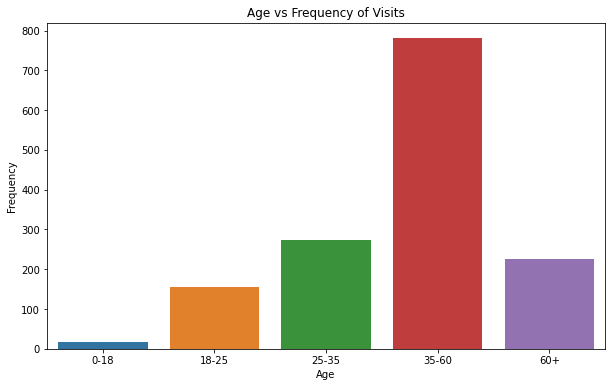

In [7]:
# Age vs frequency of visits

plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=data)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency of Visits')
plt.show()

In [8]:
data.dtypes

yummy               object
convenient          object
spicy               object
fattening           object
greasy              object
fast                object
cheap               object
tasty               object
expensive           object
healthy             object
disgusting          object
Like                object
Age               category
VisitFrequency      object
Gender              object
dtype: object

In [9]:
# Value counts for Like

data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [10]:
# mapping the labels to integer values

data['Like'] = data['Like'].map({'I love it!+5':5, '+4':4, '+3':3, '+2':2, '+1':1, '0':0, '-1':-1, '-2':-2, '-3':-3, '-4':-4, 'I hate it!-5':-5})

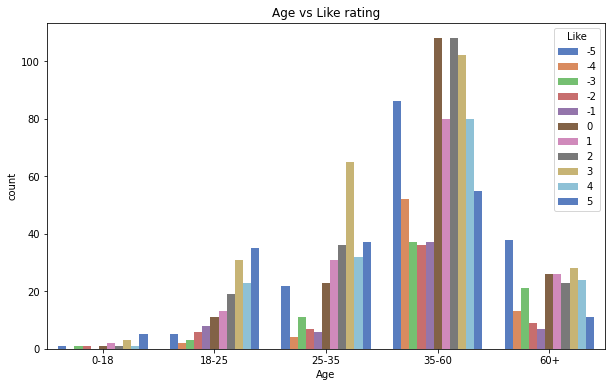

In [11]:
# like vs age

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Like', data=data, palette='muted')
plt.xlabel('Age')
plt.title('Age vs Like rating')
plt.show()


In [12]:
# value counts for visiting frequency
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [13]:
# coverting 1st 11 columns from the data to a matrix

data_matrix = data.iloc[:,:11].values
data_matrix = pd.DataFrame(data_matrix)

for cols in data_matrix.columns:
    data_matrix[cols] = data_matrix[cols].astype(str)
    data_matrix[cols].replace('No', '0', inplace=True)
    data_matrix[cols].replace('Yes', '1', inplace=True)

data_matrix = data_matrix.astype(np.int64)    
# print the means of the columns

data_matrix.mean().round(2)

0     0.55
1     0.91
2     0.09
3     0.87
4     0.53
5     0.90
6     0.60
7     0.64
8     0.36
9     0.20
10    0.24
dtype: float64

### Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(data_matrix)
principalData = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

In [15]:
data_matrix.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


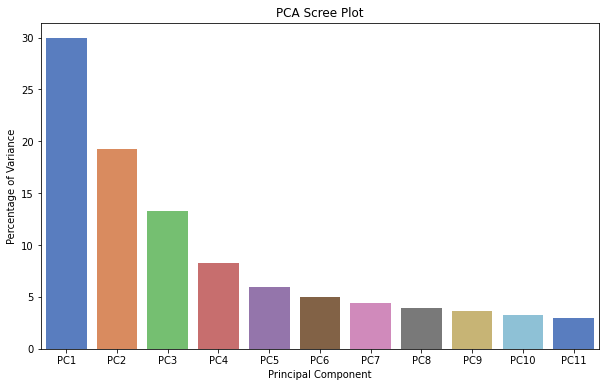

In [16]:
percent_variance = np.round(pca.explained_variance_ratio_*100, decimals=2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
plt.figure(figsize=(10,6))
sns.barplot(x=columns, y=percent_variance, palette='muted')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance')
plt.title('PCA Scree Plot')
plt.show()

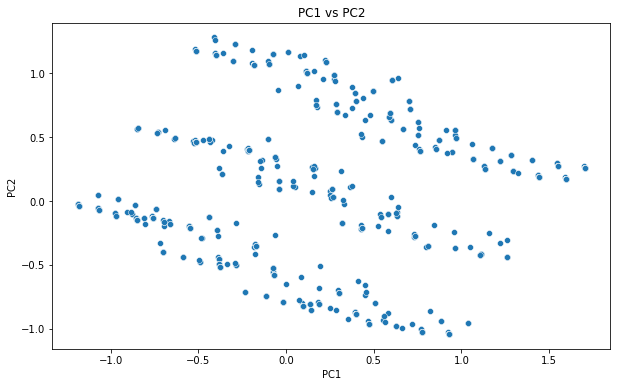

In [17]:
# Scatter plot of PC1 and PC2
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=principalData, palette='bright')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()


In [18]:
X = principalData.values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

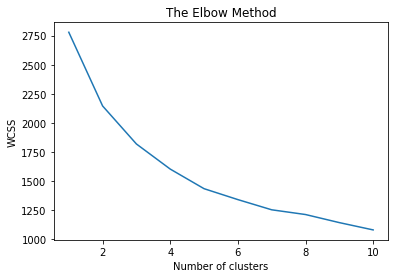

In [19]:
# WCSS for kmeans
wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Initialising 
    kmeans.fit(X) #Fitting on scaled features
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


In [20]:
# K-means Clustering 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)
labels = kmeans.predict(X)
data['Cluster'] = kmeans.labels_
print (kmeans.labels_) # Label assigned for each data point
print (kmeans.inertia_) # Gives within-cluster sum of squares. 
print(kmeans.n_iter_) # Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) # Location of the centroids on each cluster.



[2 0 0 ... 0 1 3]
1603.0604440558923
9
[[ 3.89985378e-02  8.39793952e-01 -1.64514417e-01 -3.93214464e-02
   5.44046000e-02 -3.95322306e-02  1.97813423e-02 -1.57938517e-03
  -1.69269411e-03  1.60462316e-02 -2.63316371e-02]
 [-7.24729931e-01 -1.30426601e-01 -3.95539984e-02  9.97926087e-03
  -7.26027669e-02  3.72915989e-02  4.43683057e-03  6.16552079e-03
  -8.51556103e-03 -8.85957981e-03  1.88218362e-02]
 [ 3.83784122e-01 -8.02379306e-01  7.21386720e-02 -4.68178469e-02
   1.29321340e-01 -2.36564910e-02 -1.40774337e-02 -1.29419958e-02
   1.78985976e-02 -1.98715169e-03 -1.26843752e-02]
 [ 1.18323764e+00  1.96411751e-01  2.20119185e-01  8.59572412e-02
  -6.00681636e-02 -6.78310435e-03 -1.90373799e-02  3.53051247e-03
   1.81267956e-04  2.27527484e-03  5.87196683e-03]]


In [21]:
# To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

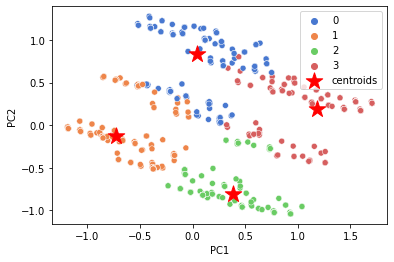

In [22]:
# Visualising the clusters
sns.scatterplot(x='PC1', y='PC2', hue=kmeans.labels_, data=principalData, palette='muted')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='centroids',marker='*')
plt.legend()
plt.show()

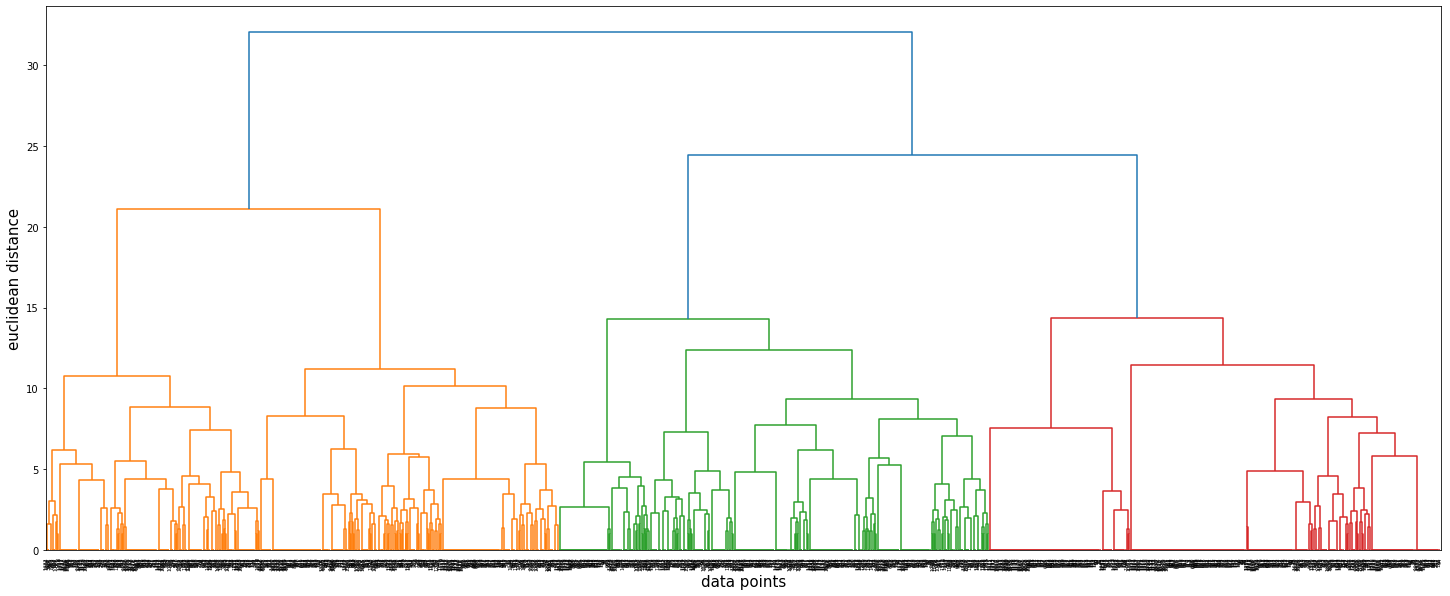

In [23]:
# Hierarchical Clustering Algorithm
# Create demogram and find the best clustering value
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(X, method='ward', metric='euclidean')
plt.rcParams['figure.figsize'] = (25,10)
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points", fontsize = 15)
plt.ylabel("euclidean distance", fontsize=15)
plt.show()

In [24]:
# Describing Segments

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab = pd.crosstab(kmeans.labels_, data['Like'])

crosstab = crosstab[[-5,-4,-3,-2,-1,0,1,2,3,4,5]]
crosstab

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
row_0,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


<Figure size 720x432 with 0 Axes>

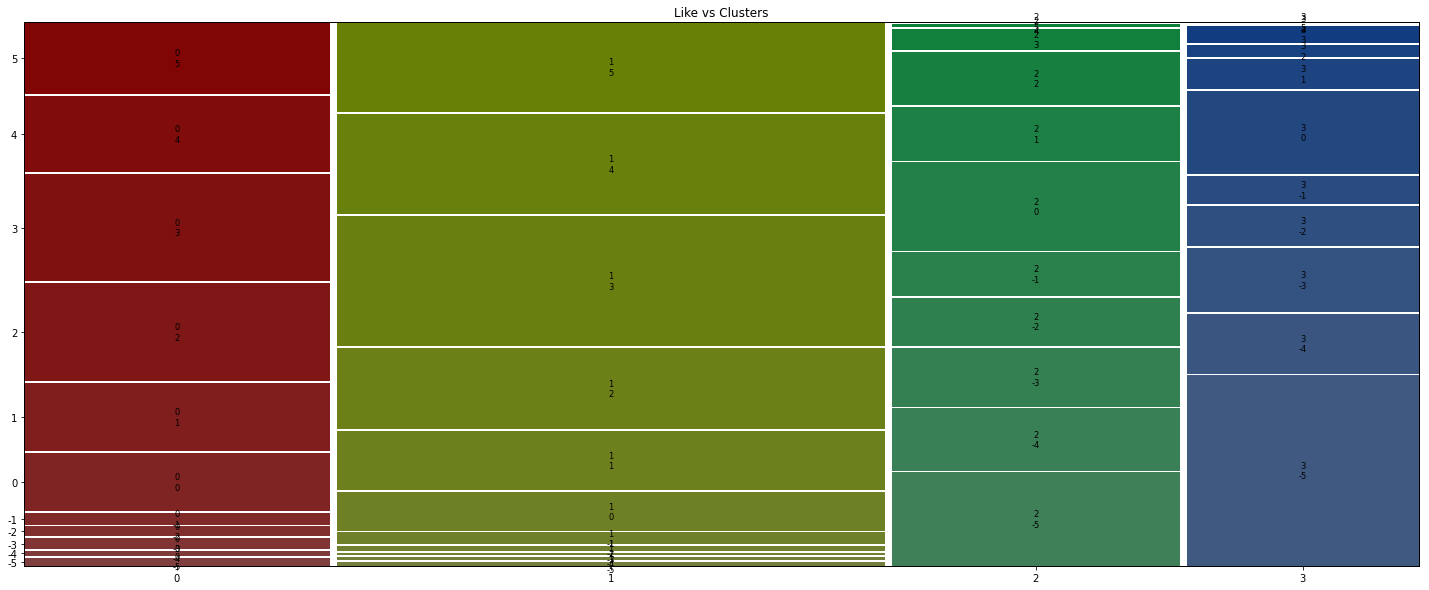

In [25]:
# Plotting the mosaic plot
plt.figure(figsize=(10,6))
mosaic(crosstab.stack(), title='Like vs Clusters')
plt.show()

In [26]:
# Clusters based on Visit Frequency
crosstab_visit = pd.crosstab(kmeans.labels_, data['VisitFrequency'])
crosstab_visit 

VisitFrequency,Every three months,More than once a week,Never,Once a month,Once a week,Once a year
row_0,,,,,,
0,78,20,4,122,66,33
1,129,32,6,238,134,41
2,75,1,56,46,23,103
3,60,1,65,33,12,75


<Figure size 720x432 with 0 Axes>

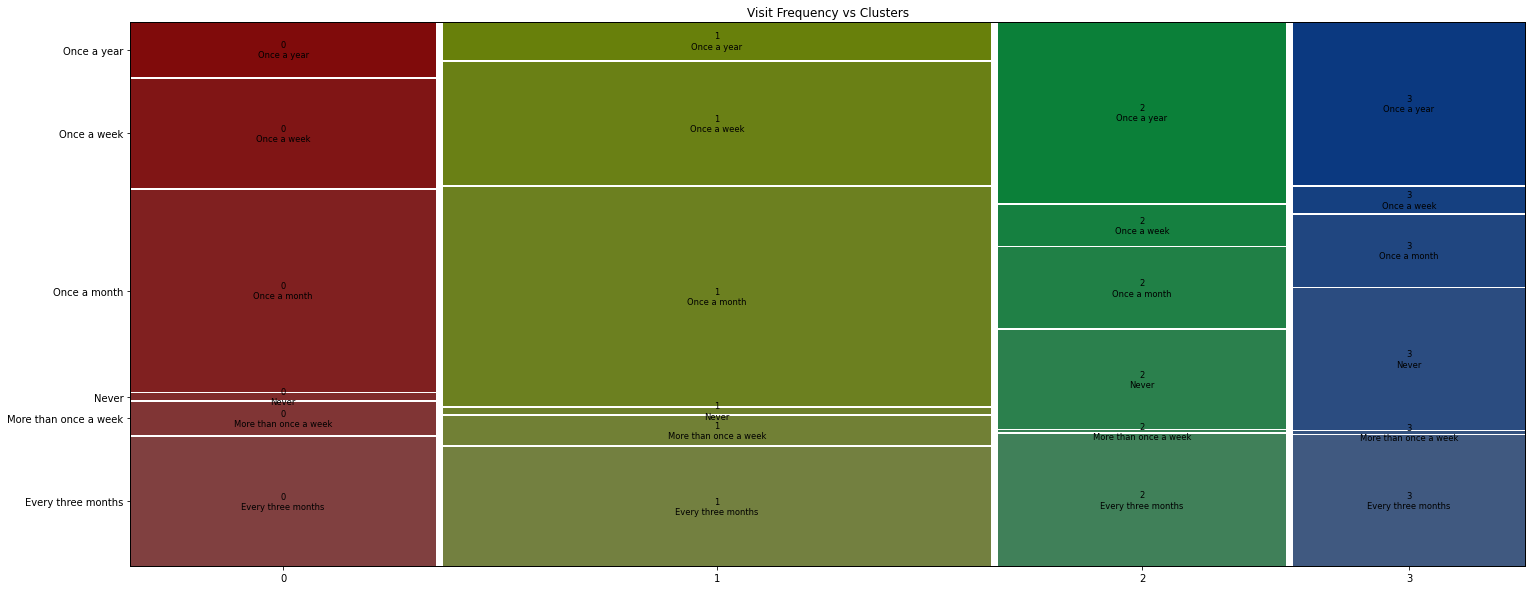

In [27]:
# Plotting the mosaic plot
plt.figure(figsize=(10,6))
mosaic(crosstab_visit.stack(), title='Visit Frequency vs Clusters')
plt.show()

In [28]:
# Clusters based on Age
crosstab_age = pd.crosstab(kmeans.labels_, data['Age'])
crosstab_age

Age,0-18,18-25,25-35,35-60,60+
row_0,,,,,
0,3,56,79,161,24
1,9,77,119,283,92
2,2,17,43,178,64
3,2,6,33,159,46


<Figure size 720x432 with 0 Axes>

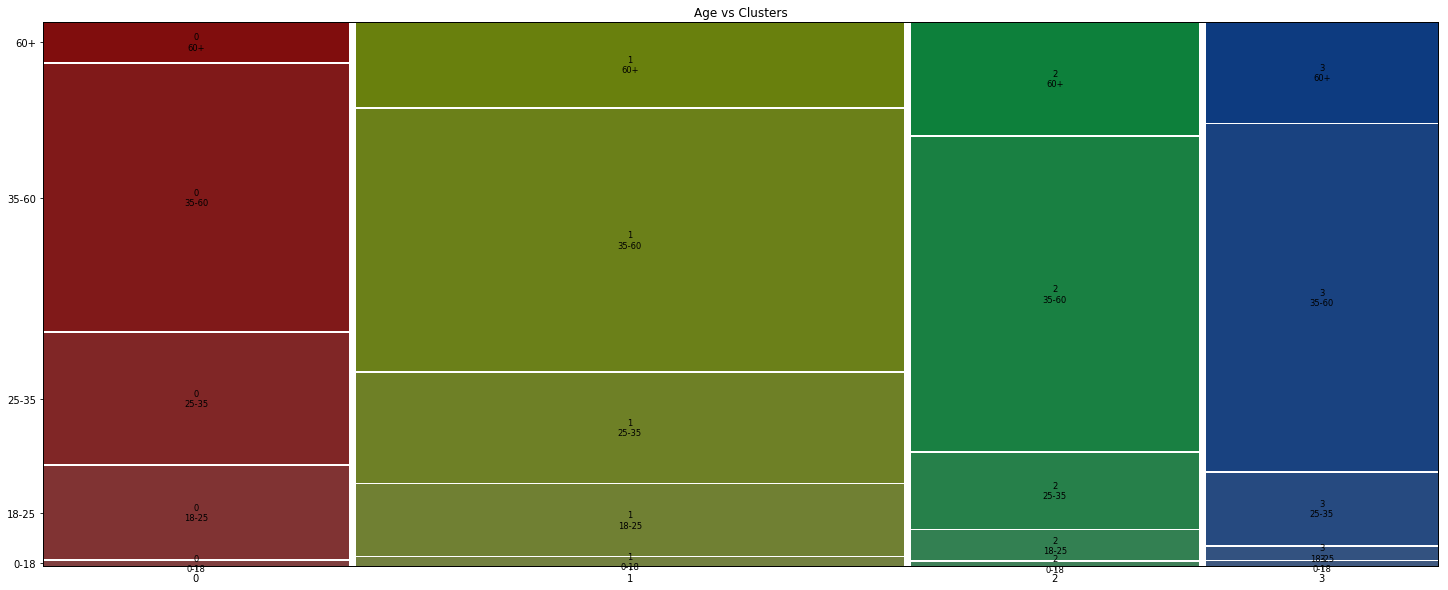

In [29]:
# Plotting the mosaic plot
plt.figure(figsize=(10,6))
mosaic(crosstab_age.stack(), title='Age vs Clusters')
plt.show()

In [30]:
# Applying label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['yummy'] = le.fit_transform(data['yummy'])
data['convenient'] = le.fit_transform(data['convenient'])
data['spicy'] = le.fit_transform(data['spicy'])
data['greasy'] = le.fit_transform(data['greasy'])
data['fattening'] = le.fit_transform(data['fattening'])
data['fast'] = le.fit_transform(data['fast'])
data['expensive'] = le.fit_transform(data['expensive'])
data['tasty'] = le.fit_transform(data['tasty'])
data['healthy'] = le.fit_transform(data['healthy'])
data['disgusting'] = le.fit_transform(data['disgusting'])
data['cheap'] = le.fit_transform(data['cheap'])
data['Age'] = le.fit_transform(data['Age'])

data['VisitFrequency'] = le.fit_transform(data['VisitFrequency'])
data['Gender'] = le.fit_transform(data['Gender'])

In [31]:
data.dtypes

yummy             int32
convenient        int32
spicy             int32
fattening         int32
greasy            int32
fast              int32
cheap             int32
tasty             int32
expensive         int32
healthy           int32
disgusting        int32
Like              int64
Age               int32
VisitFrequency    int32
Gender            int32
Cluster           int32
dtype: object

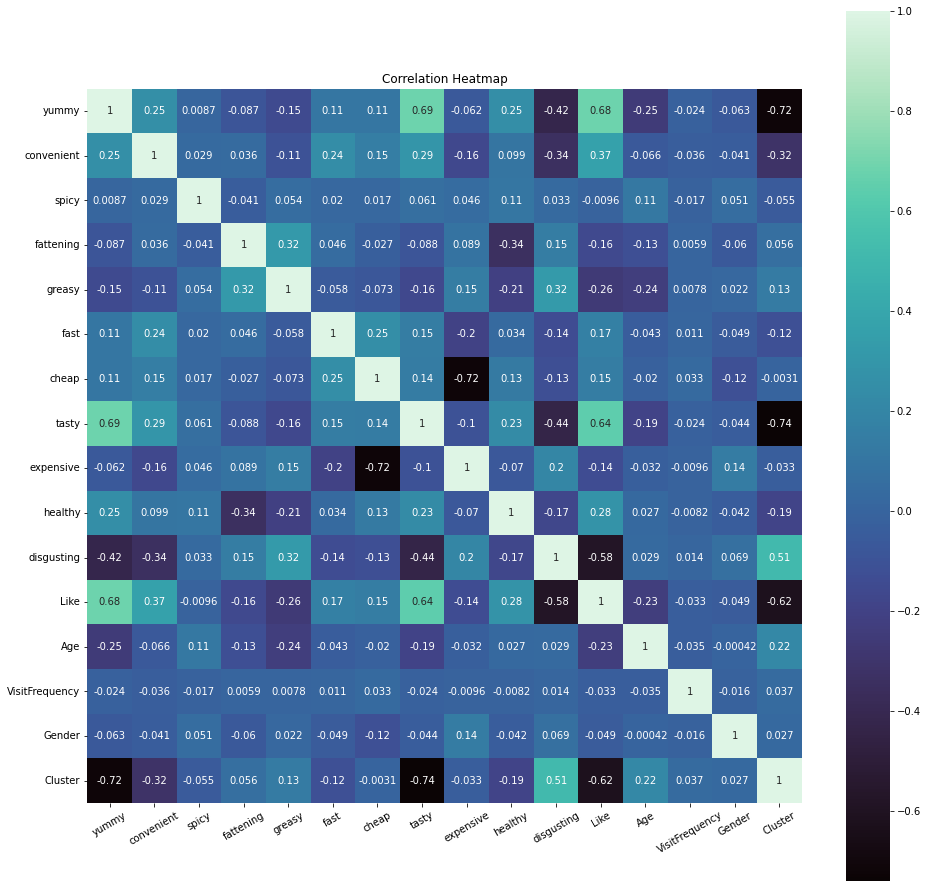

In [32]:
# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), square=True, annot=True, cmap='mako')
plt.xticks(rotation=30)
plt.title('Correlation Heatmap')
plt.show()

* Tasty and Yummy have similar correlation with other attributes so we can remove one of them.
* Somehow tasty food is highly correlated to disgusting food.
* Gender is weakly correlated to other attributes.

In [33]:
# Customising segments
# Young Customers who like expensive food

segment_1 = data[(data['Age'] == 0) & (data['expensive'] == 1)]
segment_1 = segment_1.drop(['Age'], axis=1)
# keeping only the cluster ,tasty and yummy columns

segment_1 = segment_1[['Cluster','tasty','yummy']]
segment_1

,Cluster,tasty,yummy
84,0,1,0
669,0,1,1
749,3,1,0
803,3,0,0
1052,0,1,1


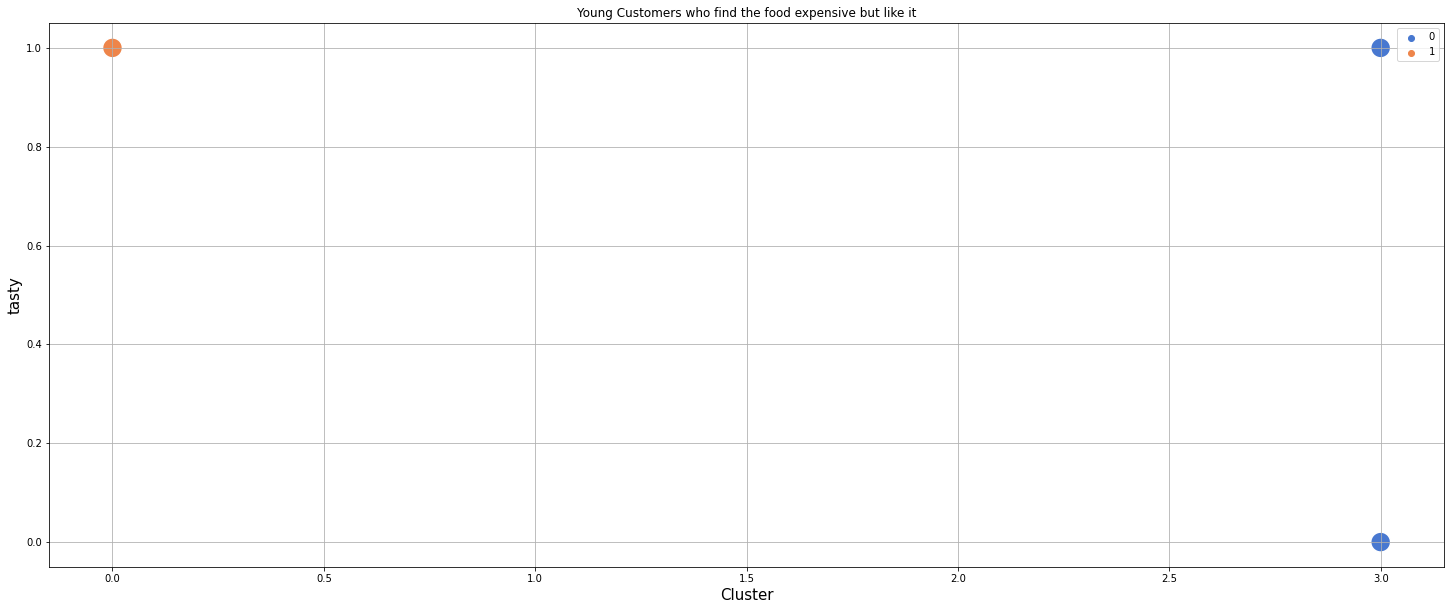

In [34]:
# Plotting the segment_1 as scatter plot
sns.scatterplot(x='Cluster', y='tasty', hue='yummy', data=segment_1,s=400, palette='muted')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('tasty',fontsize=15)
plt.grid()
plt.legend()
plt.title('Young Customers who find the food expensive but like it')
plt.show()